In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas



pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
#pd.options.display.multi_sparse = False

In [7]:
df = pd.read_csv('../global-terrorism/globalterrorismdb_0617dist.csv', encoding = "ISO-8859-1")

### To Do:

- Datum bauen
- research what the names mean and write down interesting variables

In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,

In [9]:
df.head(0)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [10]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.703500e+05,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,165744.000000,165744.000000,170346.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,26631.000000,170350.000000,170350.000000,170350.000000,170350.000000,5630.000000,374.000000,170350.000000,161005.000000,168956.000000,10018.000000,9601.000000,9706.000000,1034.000000,961.000000,1006.000000,169971.000000,1681.000000,265.000000,170350.000000,99226.000000,100851.000000,104216.000000,16248.000000,1617.000000,532.000000,263.000000,120.000000,4755.000000,170350.000000,150924.000000,11843.000000,10475.000000,1660.000000,1507.000000,74.000000,71.000000,160668.000000,105891.000000,103687.000000,155025.000000,105640.000000,101601.000000,170350.000000,60545.000000,3.548700e+04,170172.000000,12492.000000,12437.000000,3701.000000,7408.000000,76313.000000,1.279000e+03,4.960000e+02,7.070000e+02,487.000000,9911.000000,9322.000000,170350.000000,170350.000000,170350.000000,170350.000000
mean,2.001776e+11,2001.709997,6.474365,15.466845,0.043634,132.526669,7.091441,23.399774,26.350909,1.454428,0.067790,0.988441,0.992985,0.879818,-0.572069,1.294957,0.134206,0.896396,0.033871,3.220211,3.672647,5.109626,8.399654,46.865358,127.734605,10.202436,28.365170,132.039769,9.882012,55.068678,139.612326,0.084356,0.264723,0.184906,0.002483,-63.924536,-1.482266,0.027808,7.007386,0.237477,7.218045,0.448669,7.091667,-6.421241,6.428576,11.022879,6.741366,10.673317,6.869880,11.507631,6.243243,10.788732,2.387246,0.050033,0.478864,3.200239,0.041982,0.097322,-0.505970,3.299777,2.290570e+05,0.059181,4.512008,-0.378226,-42.753783,-31.886744,-0.144051,3.224502e+06,4.519918e+05,3.849663e+05,272.462012,4.624458,-28.717335,-4.583387,-4.510555,0.091083,-3.975128
std,1.314444e+09,13.144146,3.392364,8.817929,0.204279,112.848161,2.949206,18.844885,58.570068,1.009005,0.286731,0.106888,0.083461,0.325175,2.526694,0.692270,0.340875,0.304747,0.180899,1.891227,2.245530,2.263183,6.648615,30.940677,88.317182,5.736480,27.024614,125.947163,5.803961,26.677579,153.771002,0.277921,0.441317,0.388956,0.049769,227.997149,12.732807,1.140167,2.578695,1.035511,2.795849,0.498306,2.743965,4.162690,2.152366,6.402793,2.196341,7.535557,2.157719,8.352011,1.497128,8.146718,11.327709,5.969660,4.190902,34.647365,3.219002,1.449435,3.095503,0.490277,1.627247e+07,0.444913,204.474914,7.069935,85.111997,118.807885,1.198657,3.090625e+07,6.070186e+06,2.435027e+06,3130.068208,2.041008,58.737198,4.542694,4.630440,0.583166,4.691492
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-

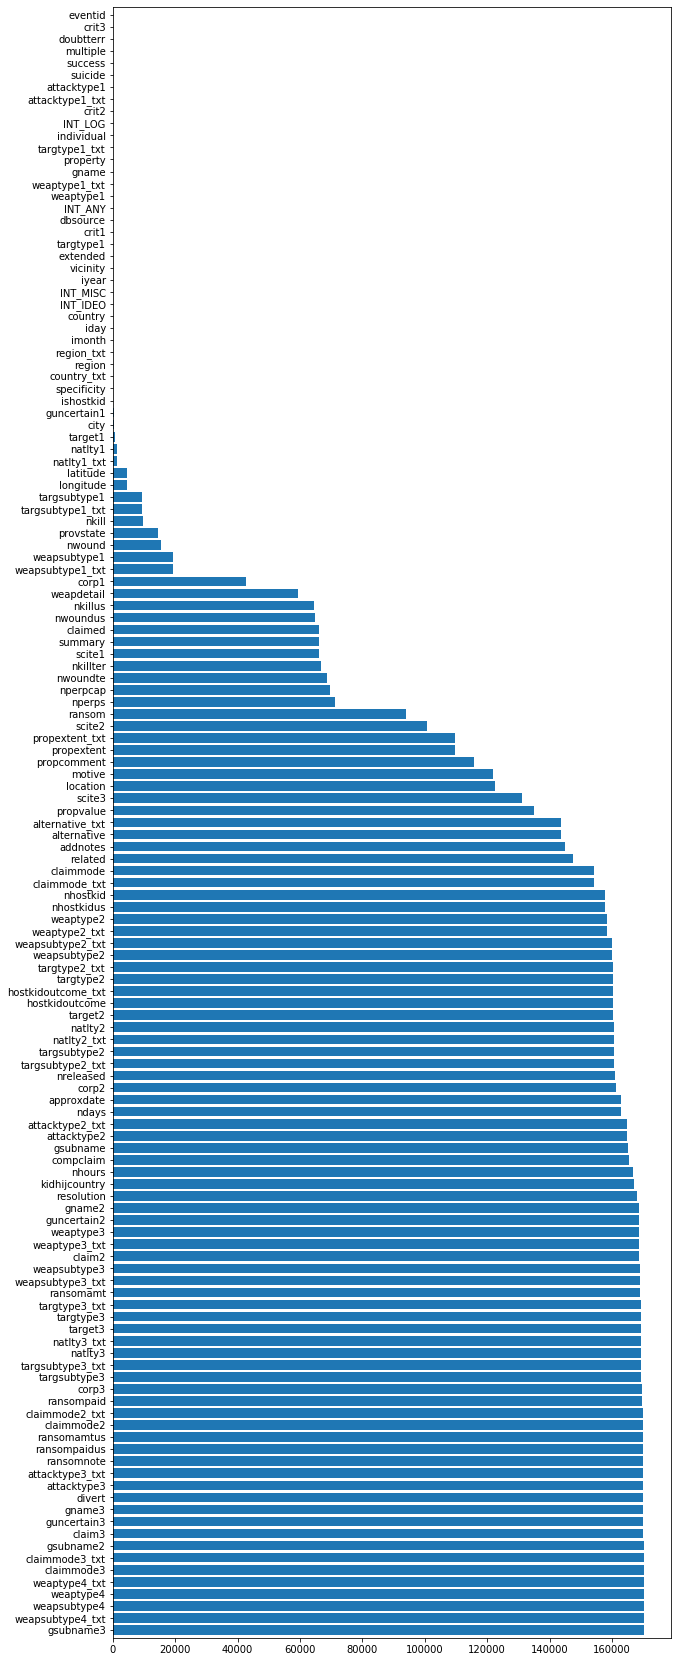

In [11]:
df.isnull().sum().sort_values(ascending=False).plot(kind="barh", figsize=(10,30), width=0.8)
plt.show()

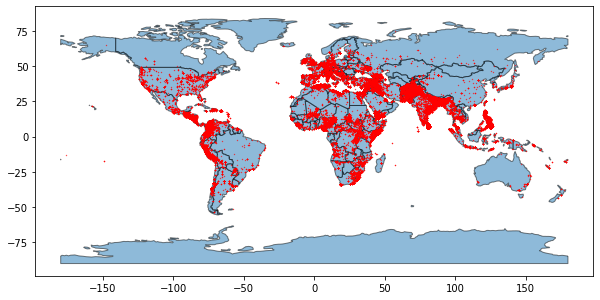

In [12]:
# For more cool mapping stuff see: https://geopandas.org/docs/user_guide/mapping.html
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

ax.scatter(df['longitude'], df['latitude'], s=0.1, c="red")

plt.show()

In [22]:
len(world)
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.00,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.00,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.00,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [21]:
df[["eventid", "region_txt"]].groupby("region_txt").count().sort_values(by="eventid", ascending=False)

,eventid
region_txt,
Middle East & North Africa,46511
South Asia,41497
South America,18762
Western Europe,16307
Sub-Saharan Africa,15491
Southeast Asia,11453
Central America & Caribbean,10340
Eastern Europe,5031
North America,3346


In [25]:
set(df["attacktype1_txt"])

{'Armed Assault',
 'Assassination',
 'Bombing/Explosion',
 'Facility/Infrastructure Attack',
 'Hijacking',
 'Hostage Taking (Barricade Incident)',
 'Hostage Taking (Kidnapping)',
 'Unarmed Assault',
 'Unknown'}

In [27]:
df[["iday", "imonth", "iyear"]].apply(lambda x: pd.to_datetime(x))#, dayfirst=True))

,iday,imonth,iyear
0,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000001970
1,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000001970
2,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000001970
3,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000001970
4,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000001970
...,...,...,...
170345,1970-01-01 00:00:00.000000031,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002016
170346,1970-01-01 00:00:00.000000031,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002016
170347,1970-01-01 00:00:00.000000031,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002016
170348,1970-01-01 00:00:00.000000031,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002016
